### Handwriten recognition using deep learning:Convolutional Neural Networks
### Running time: 20 minutos
### Edgar Acuna

In [2]:
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


<class 'numpy.ndarray'>


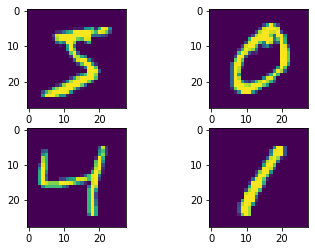

In [4]:
# normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
print(type(X_train))
# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(X_train[0])
ax2.imshow(X_train[1])
ax3.imshow(X_train[2])
ax4.imshow(X_train[3])

In [5]:
# Changing dimension of input images from N*28*28 to  N*784
#X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_train=X_train.reshape(-1,28,28,1)
#X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_test=X_test.reshape(-1,28,28,1)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
## Changing labels to one-hot encoded vector
#lb = LabelBinarizer()
#y_train = lb.fit_transform(y_train)
y_train=to_categorical(y_train)
#y_test = lb.transform(y_test)
y_test=to_categorical(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(60000, 28, 28, 1)
Test dimension:
(10000, 28, 28, 1)
Train labels dimension:
(60000, 10)
Test labels dimension:
(10000, 10)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train,test_size=.2,random_state=13)

In [7]:
from keras.models import Sequential,Input, Model
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D 
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [8]:
## Importing required libraries
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

In [9]:
batch_size=128
epochs=15
num_classes=10

In [10]:
#Anadiendo capas secuencialmente al modelo
digits_model=Sequential()
digits_model.add(Conv2D(32,kernel_size=(3,3),activation="linear",input_shape=(28,28,1),padding="same"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(MaxPooling2D((2,2),padding="same"))
digits_model.add(Conv2D(64,(3,3),activation="linear",padding="same"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
digits_model.add(Conv2D(128,(3,3),activation="linear",padding="same"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
digits_model.add(Flatten())
digits_model.add(Dense(128,activation="linear"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(Dense(num_classes,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#compilando con las capas
digits_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [12]:
digits_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [13]:
digits_train=digits_model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 87s 2ms/step - loss: 0.2136 - accuracy: 0.9346 - val_loss: 0.0593 - val_accuracy: 0.9807
Epoch 2/15
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0509 - accuracy: 0.9836 - val_loss: 0.0449 - val_accuracy: 0.9862
Epoch 3/15
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0358 - val_accuracy: 0.9882
Epoch 4/15
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0361 - val_accuracy: 0.9885
Epoch 5/15
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0414 - val_accuracy: 0.9881
Epoch 6/15
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0377 - val_accuracy: 0.9889
Epoch 7/15
48000/480

In [14]:
test_eval=digits_model.evaluate(X_test,y_test,verbose=0)

In [16]:
print(test_eval[1])

0.9918000102043152
